In [41]:
%matplotlib inline

# The Lorenz63 model implemented in FABM

The equations read:

$ \frac{dx}{dt} = \sigma ( y - x ) - \beta x y$

$ \frac{dy}{dt} = x ( \rho - z ) - y$

$ \frac{dz}{dt} = x y - \beta z$


For further information [see](https://en.wikipedia.org/wiki/Lorenz_system)

Import standard _python_ packages _and_ __pyfabm__

In [42]:
import numpy
import scipy.integrate

Import __pyfabm__ - the python module that contains the Fortran based [FABM](www.fabm.net)

In [43]:
import pyfabm
#pyfabm.get_version()

## Configuration
The model configuration is done via the YAML formatted file.

In [45]:
yaml_file = 'fabm-bb-lorenz63.yaml'
model = pyfabm.Model(yaml_file)
model.findDependency('bottom_depth').value = 1.
model.checkReady(stop=True)

True

## Model increment

In [46]:
def dy(y,t0):
    model.state[:] = y
    return model.getRates()


## Time axis and model integration

In [47]:
t = numpy.arange(0.0, 40.0, 0.01)
y = scipy.integrate.odeint(dy,model.state,t)

## Plot the results

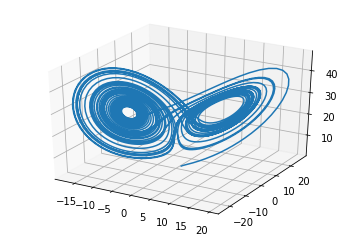

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(y[:,0], y[:,1], y[:,2])
plt.show()
